In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
%matplotlib inline
from datetime import datetime
import baostock as bs


In [ ]:
定义获取股市数据函数

In [33]:

def get_data(code):
    end = datetime.now()
    start = datetime(end.year - 1, end.month, end.day).strftime('%Y-%m-%d')
    end = end.strftime('%Y-%m-%d')
    # 登陆系统
    lg = bs.login()
    # 获取数据
    rs_result = bs.query_history_k_data_plus(
            code,
            fields="date,open,high,low,close,volume",
            start_date=start, 
            end_date=end, 
            frequency="d", 
            adjustflag="3")
    df_result = rs_result.get_data()
    # 登出系统
    bs.logout()
    df_result['date'] = df_result['date'].map(lambda x: datetime.strptime(x,'%Y-%m-%d'))
    _res = df_result.set_index('date')
    res = _res.applymap(lambda x: float(x))
    return res

In [ ]:
选择四个银行股票近一年内的历史交易数据，分别为中国银行，工商银行， 建设银行，
招商银行。
其股票代码分别是'sh.601988', 'sz.601398', 'sz.601939', 'sh.600036'

In [34]:
liquor_list = ['sh.601988', 'sh.601398', 
               'sh.601939', 'sh.600036']
# 中国银行，工商银行， 建设银行，招商银行
company_name = ['BOC','ICBC','CCB','CMB']
# company
a = zip(company_name ,liquor_list) 
for name, code in a:
    exec(f"{name}=get_data(code)")



login success!
logout success!
login success!
logout success!
login success!
logout success!
login success!
logout success!


In [ ]:
注意这里使用高阶函数exec进行批量赋值。

In [ ]:
历史收盘价
绘制四支股票的历史收盘价，
从历史收盘价格趋势图大致可以看出，四支股票的趋势很相似。

In [35]:
# 需要批量赋值的变量名称
company_list = [BOC, ICBC, CCB, CMB]
company_list
# for company, com_name in zip(company_list, company_name):
#     company["company_name"] = com_name
#     print(com_name)

# # 将四支股票数据进行纵向合并
# df = pd.concat(company_list, axis=0)
# df
# df
# print(type(company_list))
# company_list

[            open  high   low  close       volume
 date                                            
 2022-05-27  3.21  3.22  3.20   3.22  107585002.0
 2022-05-30  3.21  3.22  3.19   3.20  176262701.0
 2022-05-31  3.19  3.20  3.19   3.19  115257848.0
 2022-06-01  3.19  3.20  3.18   3.19  105838863.0
 2022-06-02  3.19  3.20  3.18   3.19   67585431.0
 ...          ...   ...   ...    ...          ...
 2023-05-22  4.18  4.24  4.14   4.17  277860661.0
 2023-05-23  4.15  4.18  4.03   4.04  337049586.0
 2023-05-24  4.02  4.02  3.88   3.89  491028400.0
 2023-05-25  3.86  3.89  3.83   3.89  280922299.0
 2023-05-26  3.88  3.92  3.84   3.89  238655912.0
 
 [244 rows x 5 columns],
             open  high   low  close       volume
 date                                            
 2022-05-27  4.66  4.67  4.64   4.67  124999758.0
 2022-05-30  4.67  4.69  4.64   4.65  158827431.0
 2022-05-31  4.64  4.68  4.63   4.66  251365747.0
 2022-06-01  4.65  4.67  4.63   4.65  140067661.0
 2022-06-02  4.64  4.65

In [ ]:
#黄梓卫（历史收盘价折线图 移动平均线）

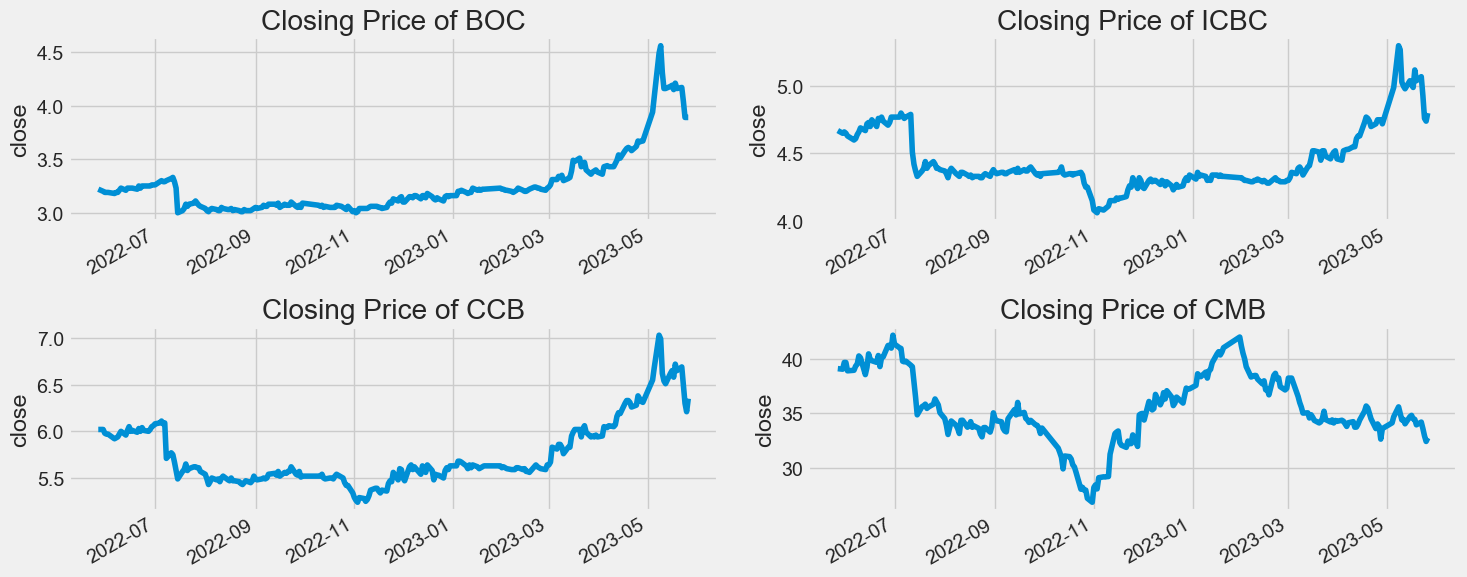

In [36]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
# company['high']
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['close'].plot()
    plt.ylabel('close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")  
plt.tight_layout()


In [ ]:
各股票的移动平均线

In [37]:
# 设置移动天数
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
company[column_name]
print(type(company[column_name]))

<class 'pandas.core.series.Series'>


In [ ]:
现在继续绘制所有额外的移动平均线。

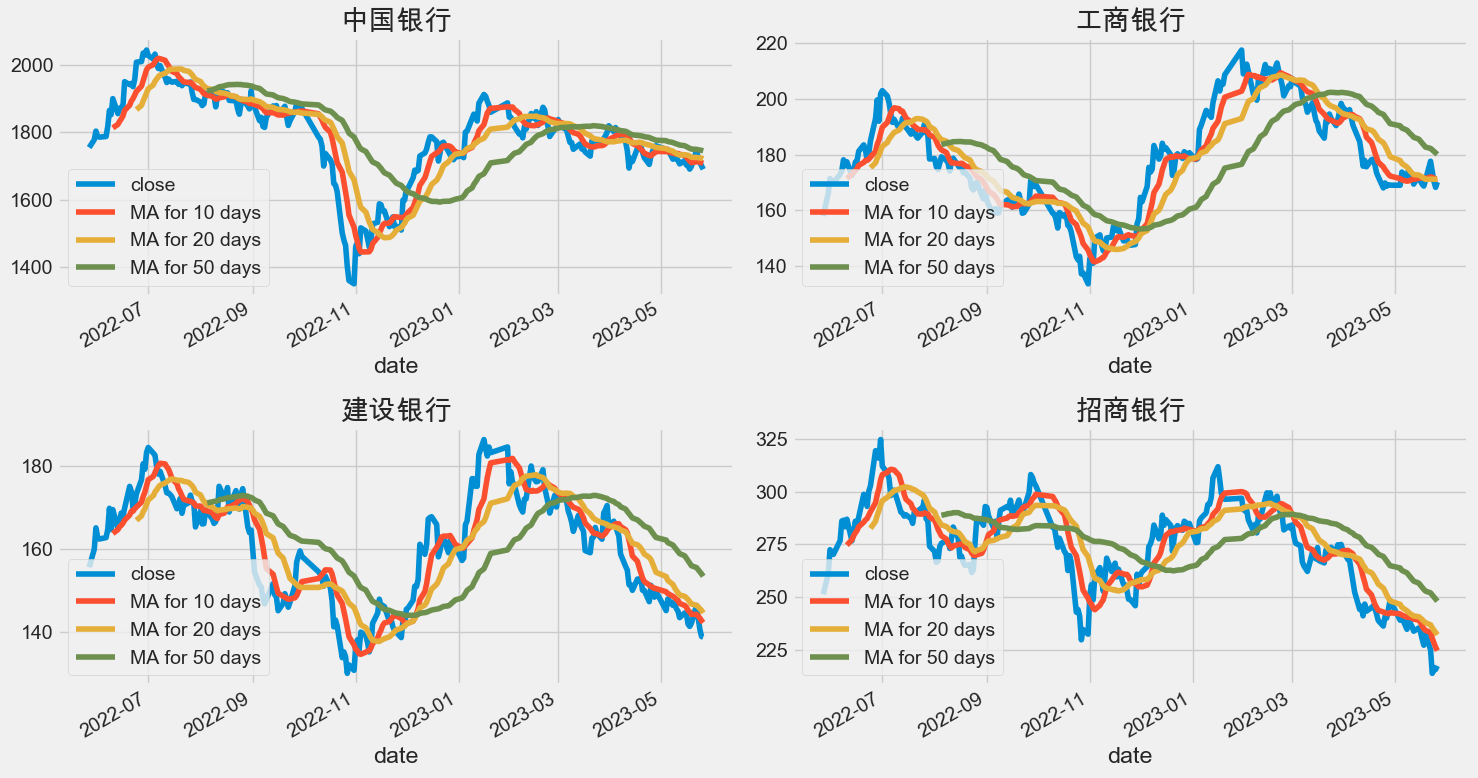

In [38]:

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
maotai[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('中国银行')

wuliangye[['close', 'MA for 10 days', 
          'MA for 20 days', 'MA for 50 days']
          ].plot(ax=axes[0,1])
axes[0,1].set_title('工商银行')

yanghe[['close', 'MA for 10 days', 
        'MA for 20 days', 'MA for 50 days']
        ].plot(ax=axes[1,0])
axes[1,0].set_title('建设银行')

fenjiu[['close', 'MA for 10 days', 
        'MA for 20 days', 'MA for 50 days']
        ].plot(ax=axes[1,1])
axes[1,1].set_title('招商银行')
fig.tight_layout()

In [ ]:
# 胡奕峰 平均日回报率

In [ ]:
股票的平均日回报率是多少?
现在我们已经完成了一些基本分析，现在进一步深入研究。现在我们来分析一下股票
的风险。这里需要仔细观察股票的每日变化趋势。使用pct_change来查找每天的百分
比变化

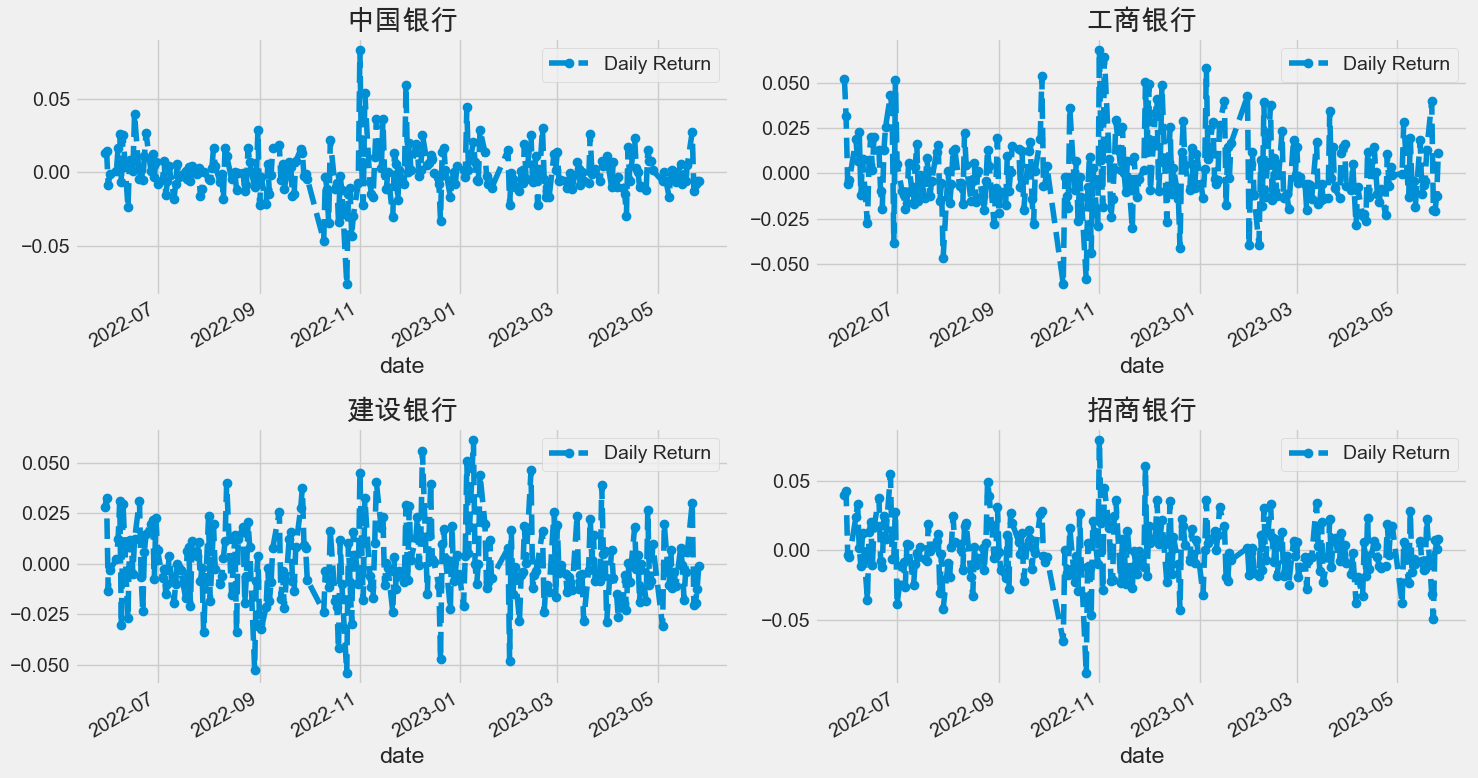

In [39]:

for company in company_list:
    company['Daily Return'] = company['close'].pct_change()
# 画出日收益率
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
maotai['Daily Return'].plot(ax=axes[0,0], legend=True, 
                            linestyle='--', marker='o')
axes[0,0].set_title('中国银行')
wuliangye['Daily Return'].plot(ax=axes[0,1], legend=True, 
                               linestyle='--', marker='o')
axes[0,1].set_title('工商银行')
yanghe['Daily Return'].plot(ax=axes[1,0], legend=True, 
                            linestyle='--', marker='o')
axes[1,0].set_title('建设银行')
fenjiu['Daily Return'].plot(ax=axes[1,1], legend=True, 
                            linestyle='--', marker='o')
axes[1,1].set_title('招商银行')
fig.tight_layout()

In [ ]:
#胡奕峰 黄鸿宇（平均日收益）

In [ ]:
现在用直方图来全面看看平均日收益。我们将使用seaborn在同一图上创建直方图和
kde图

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

date
2022-05-27         NaN
2022-05-30   -0.001278
2022-05-31    0.015869
2022-06-01    0.000000
2022-06-02   -0.019400
                ...   
2023-05-22    0.007364
2023-05-23   -0.017544
2023-05-24   -0.019940
2023-05-25   -0.015487
2023-05-26    0.009870
Name: Daily Return, Length: 244, dtype: float64

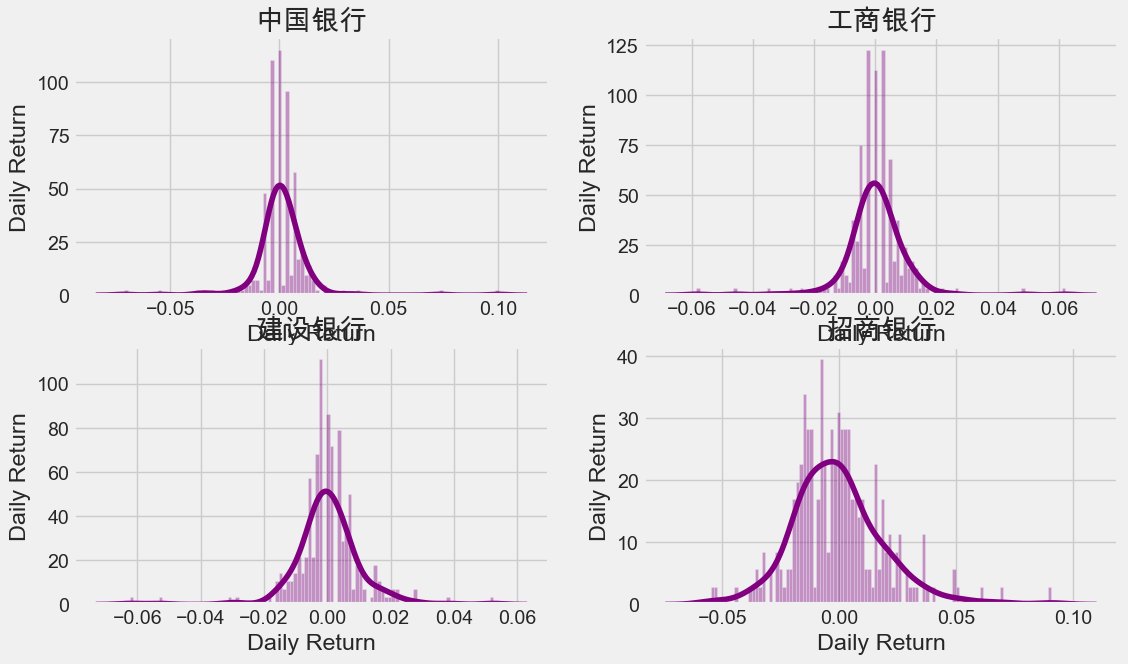

In [40]:
# 注意这里使用了dropna()，否则seaborn无法读取NaN值
plt.figure(figsize=(12, 7))
company_name_c = ['中国银行','工商银行','建设银行','招商银行']
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name_c[i - 1]}')
company['Daily Return']
# 也可以这样绘制
# maotai['Daily Return'].hist()
# plt.tight_layout();


In [ ]:
股票收盘价之间的相关性
如果想分析列表中所有股票的回报呢？

可以将每个股票数据框构建一个包含所有['Close']列的DataFrame。将所有的收盘价为
银行股列表到一个DataFrame

In [41]:
index = maotai.index
closing_df = pd.DataFrame()
for company, company_n in zip(company_list,company_name_c):
    temp_df = pd.DataFrame(index=company.index,
                           data = company['close'].values ,
                           columns=[company_n])
    closing_df = pd.concat([closing_df,temp_df],axis=1)
# 看看数据
closing_df.head()


,中国银行,工商银行,建设银行,招商银行
date,,,,
2022-05-27,3.22,4.67,6.02,39.12
2022-05-30,3.20,4.65,6.02,39.07
2022-05-31,3.19,4.66,5.98,39.69
2022-06-01,3.19,4.65,5.97,39.69
2022-06-02,3.19,4.63,5.97,38.92


In [42]:
liquor_rets = closing_df.pct_change()
liquor_rets.head()


,中国银行,工商银行,建设银行,招商银行
date,,,,
2022-05-27,NaN,NaN,NaN,NaN
2022-05-30,-0.006211,-0.004283,0.000000,-0.001278
2022-05-31,-0.003125,0.002151,-0.006645,0.015869
2022-06-01,0.000000,-0.002146,-0.001672,0.000000
2022-06-02,0.000000,-0.004301,0.000000,-0.019400


In [ ]:
使用joinplot来比较中国银行和工商银行的日收益。

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


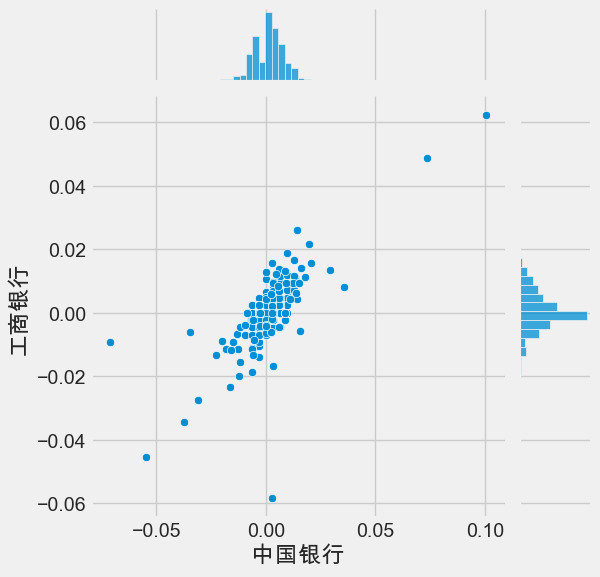

In [44]:
sns.jointplot('中国银行', '工商银行', 
              liquor_rets, kind='scatter')

In [ ]:
#蒋楠 蒙垚欣（相关性）

In [ ]:
两个股票是完全(和正的)相互相关，
它的日回报值之间的线性关系应该发生。
Seaborn和pandas使得我们很容易对我们的技术股票行情列表中的每一个可能的股票组合
重复这种比较分析。我们可以使用sns.pairplot() 自动创建这个绘图。可以简单地调用
DataFrame上的pairplot来对所有比较进行自动可视化分析

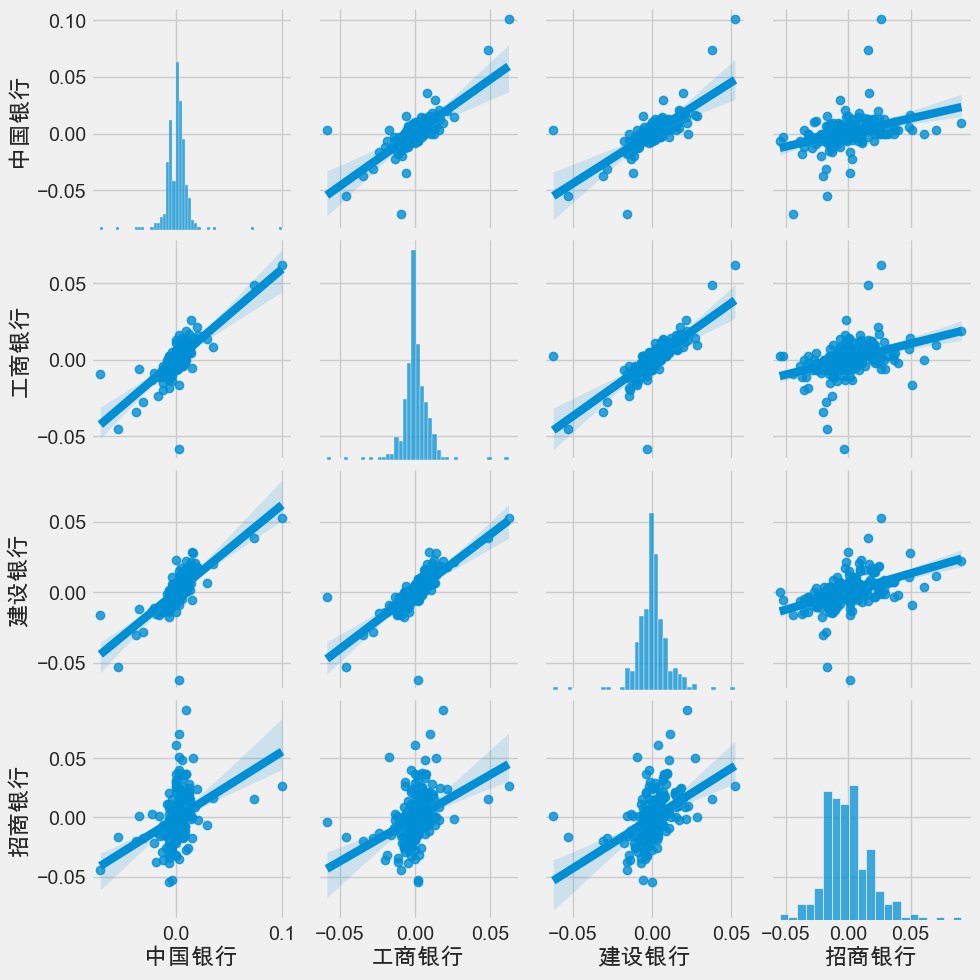

In [45]:
sns.pairplot(liquor_rets, kind='reg')

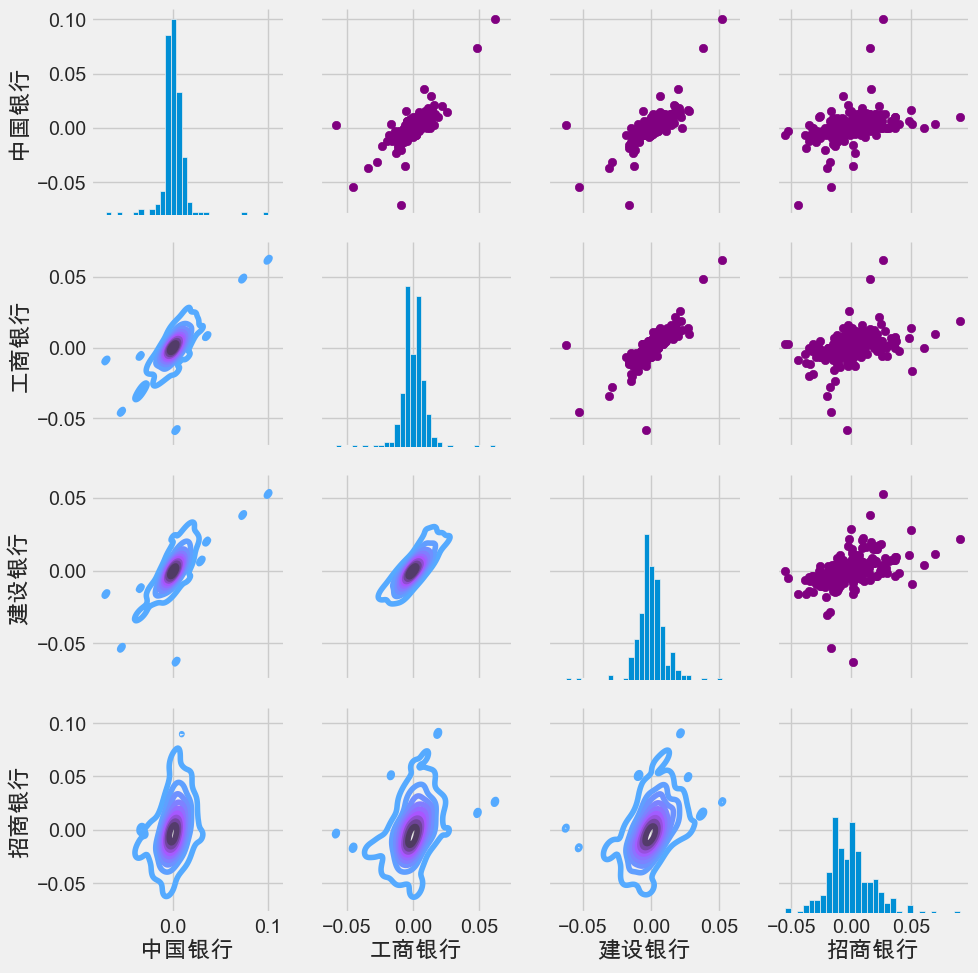

In [46]:
# 通过命名为returns_fig来设置我们的图形，
# 在DataFrame上调用PairPLot
return_fig = sns.PairGrid(liquor_rets.dropna())
# 使用map_upper，我们可以指定上面的三角形是什么样的。
return_fig.map_upper(plt.scatter, color='purple')
# 我们还可以定义图中较低的三角形，
# 包括绘图类型(kde)或颜色映射(blueppurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
# 最后，我们将把对角线定义为每日收益的一系列直方图
return_fig.map_diag(plt.hist, bins=30)



In [ ]:
绘制四支股票的收盘价相关图

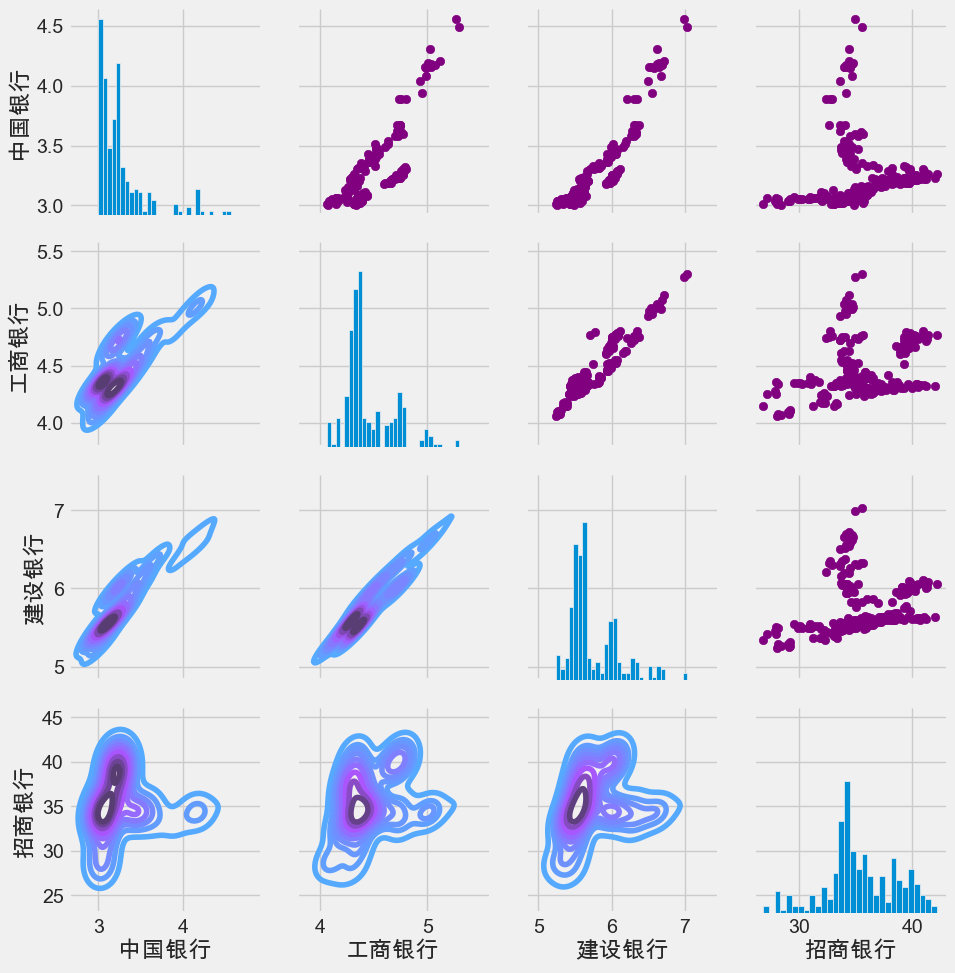

In [47]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


In [ ]:
做一个相关图，以得到股票日收益值之间的相关性的实际数值。

<AxesSubplot: >

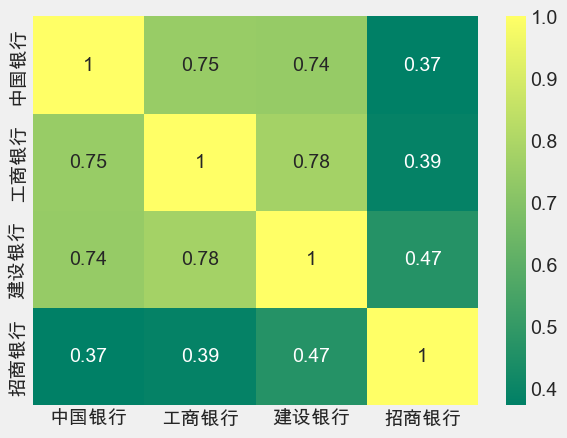

In [48]:
# 让我们用sebron来做一个每日收益的快速相关图
sns.heatmap(liquor_rets.corr(), 
            annot=True, cmap='summer')

<AxesSubplot: >

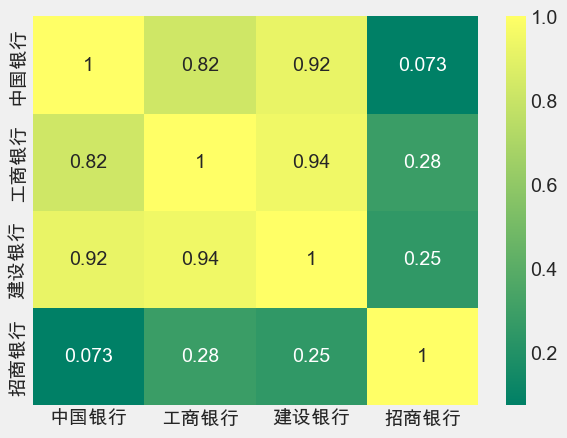

In [49]:
sns.heatmap(closing_df.corr(), 
            annot=True, cmap='summer')

In [ ]:
从数字和视觉上看到中国银行和其他几个银行股票收益率有最强的相关性。
有趣的是，所有的银行都是正相关的

In [ ]:
#邓乾君 （预期收益和日收益的标准差 以及 预测收盘价）

In [ ]:
股票投资的风险金融风险往往来源于未来的不确定性。我们通常假设股票价格服从对
数正态分布，因而股票回报率服从正态分布。基于此假设，股票回报率的标准房差常
用来度量金融风险，也称为波动率。我们有很多方法来量化风险，其中一个最基本的
方法是利用我们收集的关于日收益率百分比的信息将预期收益率与日收益率的标准差
进行比较

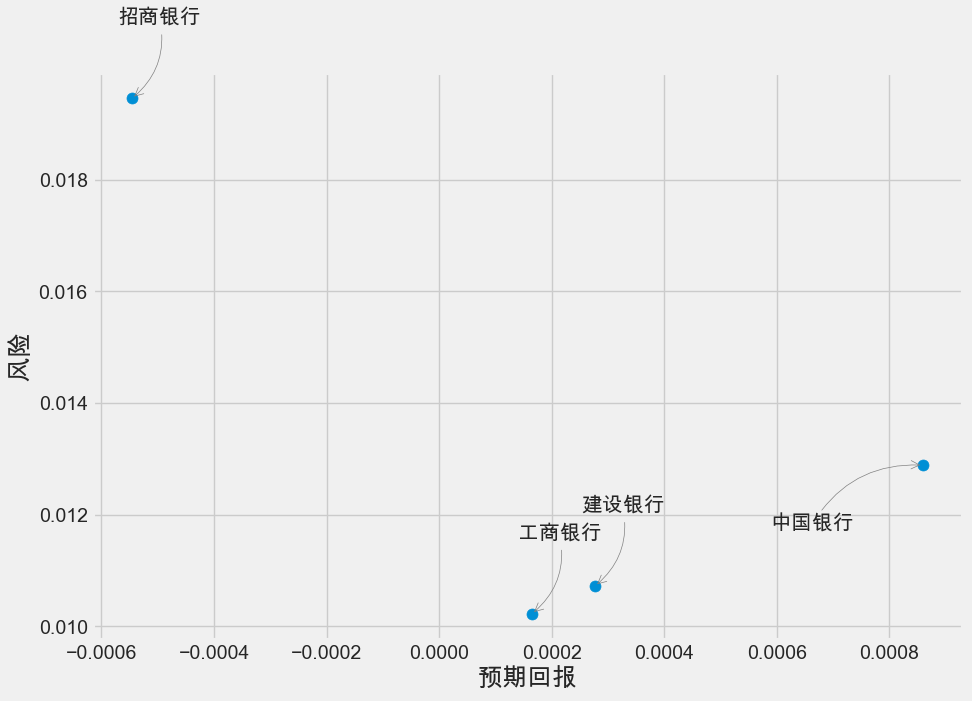

In [50]:
# 让我们首先将一个新的DataFrame定义为原始liquor_rets的 DataFrame的压缩版本
rets = liquor_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('预期回报',fontsize=18)
plt.ylabel('风险',fontsize=18)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    if label == '中国银行':
        xytext=(-50,-50)
    else:
        xytext=(50,50)
    plt.annotate(label, xy=(x, y), xytext=xytext, 
                 textcoords='offset points', 
                 ha='right', va='bottom', fontsize=15,
                 arrowprops=dict(arrowstyle='->', 
                                 color='gray', 
                                 connectionstyle='arc3,rad=-0.3'))

In [ ]:
#邓乾君（收盘价预测）

In [ ]:
中国银行收盘价预测

In [51]:
# 获取股票报价
df = maotai.loc[:,['open','high','low','close','volume']]
df.head()

,open,high,low,close,volume
date,,,,,
2022-05-27,1759.99,1780.00,1753.01,1755.16,2511958.0
2022-05-30,1766.00,1790.55,1766.00,1778.41,3446569.0
2022-05-31,1774.77,1814.90,1766.98,1804.03,4075082.0
2022-06-01,1802.00,1814.78,1779.00,1788.25,2176001.0
2022-06-02,1787.97,1795.80,1780.00,1786.00,1691473.0


In [ ]:
可视化收盘价

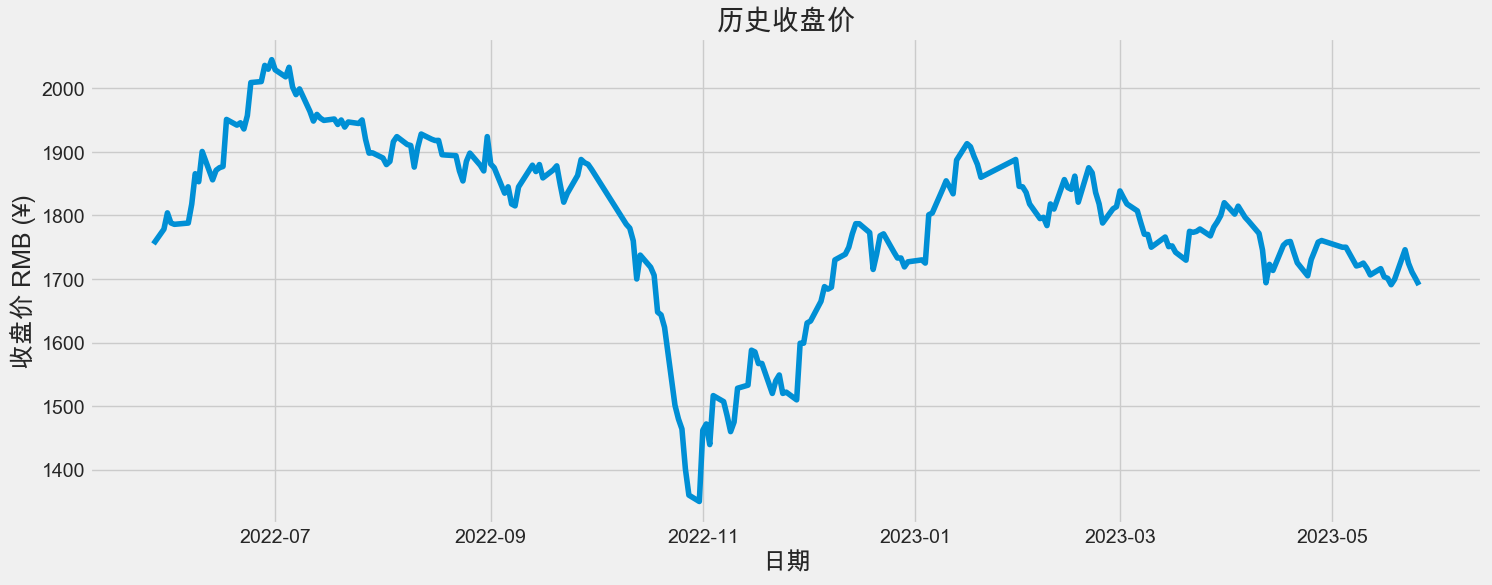

In [52]:
plt.figure(figsize=(16,6))
plt.title('历史收盘价',fontsize=20)
plt.plot(df['close'])
plt.xlabel('日期', fontsize=18)
plt.ylabel('收盘价 RMB (¥)', fontsize=18)
plt.show()



In [53]:
# 创建一个只有收盘价的新数据帧
data = df.filter(['close'])
# 将数据帧转换为numpy数组
dataset = data.values
# 获取要对模型进行训练的行数
training_data_len = int(np.ceil( len(dataset) * .95 ))
# 数据标准化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# 创建训练集，训练标准化训练集
train_data = scaled_data[0:int(training_data_len), :]
# 将数据拆分为x_train和y_train数据集
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)     
# 将x_train和y_train转换为numpy数组 
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape数据
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.58296403, 0.61641727, 0.65328058, 0.63057554, 0.62733813,
       0.63021583, 0.67323741, 0.7418705 , 0.72374101, 0.79223022,
       0.72805755, 0.74964029, 0.75553957, 0.75827338, 0.8647482 ,
       0.85182734, 0.85717986, 0.84316547, 0.87352518, 0.94821583,
       0.95043165, 0.98705036, 0.97841727, 1.        , 0.97705036,
       0.96115108, 0.9827482 , 0.9381295 , 0.92086331, 0.93381295,
       0.8828777 , 0.86102158, 0.87610072, 0.8676259 , 0.86258993,
       0.86569784, 0.85338129, 0.86345324, 0.84748201, 0.85899281,
       0.85561151, 0.86361151, 0.81956835, 0.78848921, 0.7891223 ,
       0.77741007, 0.76256115, 0.76978417, 0.81440288, 0.82584173,
       0.80795683, 0.8057554 , 0.75683453, 0.80129496, 0.83165468,
       0.81998561, 0.81703597, 0.81726619, 0.78489209, 0.78418705])]
[0.7827050359712231]
[array([0.58296403, 0.61641727, 0.65328058, 0.63057554, 0.62733813,
       0.63021583, 0.67323741, 0.7418705 , 0.72374101, 0.79223022,
       0.72805755, 0.74964029, 0.7555

In [ ]:
使用LSTM模型预测股价

In [26]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.7/1.7 MB 58.2 kB/s eta 0:00:00


In [27]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 272.8/272.8 MB 152.0 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 268.4 kB/s eta 0:00:00
     ------------------------------------ 440.7/440.7 kB 483.7 kB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 352.2 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 270.8 kB/s eta 0:00:00
     ------------------------------------ 422.5/422.5 kB 338.5 kB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 284.6 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [54]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
# 建立LSTM模型
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')
# 训练模型
model.fit(x_train, y_train, batch_size=1, epochs=1)

# 170/170 [==============] - 7s 25ms/step - loss: 0.0253
# 创建测试数据集
# 创建一个新的数组，包含从索引的缩放值
test_data = scaled_data[training_data_len - 60: , :]
# 创建数据集x_test和y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])    
# 将数据转换为numpy数组
x_test = np.array(x_test)
# 重塑的数据
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# 得到模型的预测值 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# 得到均方根误差(RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

1/1 [==============================] - 1s 610ms/step


In [ ]:
将训练数据、实际数据集预测数据可视化

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20956\3443084707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


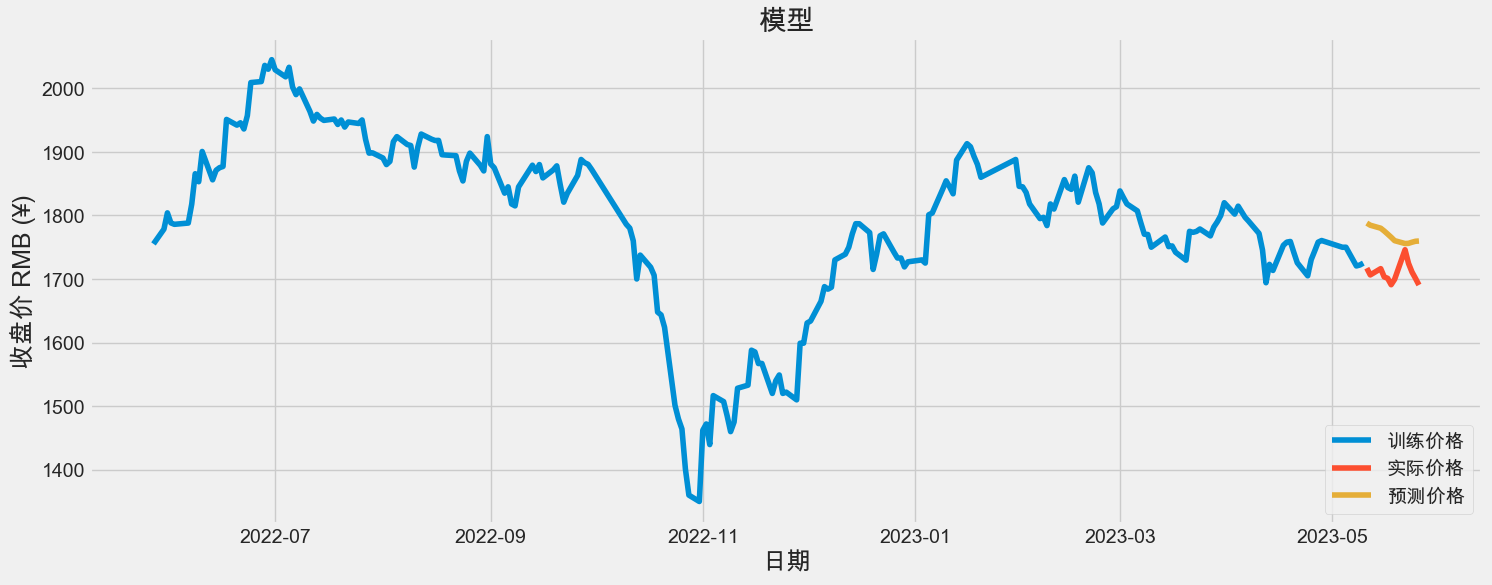

In [55]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('模型')
plt.xlabel('日期', fontsize=18)
plt.ylabel('收盘价 RMB (¥)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['训练价格', '实际价格', '预测价格'], loc='lower right')
plt.show()
